In [12]:
import folium


from branca.element import Figure

import pandas as pd

from haversine import haversine
from geopy.distance import geodesic
from geopy.distance import great_circle

import numpy as np


import matplotlib.pyplot as plt

In [13]:


coords_GPS_cdmx = [[19.3219639281176683,-99.1846521393168814],[19.3218988592583898,-99.1847336284587158],[19.3221113878062987,-99.1849123085385429],[19.3222468426452103,-99.1849879166498454],[19.3224621996894399,-99.1849850819456833],[19.3226799867927603,-99.1849933511056463],[19.3227374156374090,-99.1847991908183246],[19.3228633284781992,-99.1843551576722433],[19.3229965290014682,-99.1839342114434857],[19.3232154584485905,-99.1834002890267783],[19.3233975540518017,-99.1831588926648777],[19.3234832731432711,-99.1828632650487236],[19.3235229640505004,-99.1827116768410235],[19.3235148209169587,-99.1825383023669787],[19.3234676609309801,-99.1823257152247493],[19.3230871422154387,-99.1813608885357070],[19.3228385233600797,-99.1807233366264853],[19.3225958670059512,-99.1801225228736172],[19.3223544468944013,-99.1795084063390107],[19.3221222934657710,-99.1788231315309758],[19.3220478088174303,-99.1783480366278667],[19.3220572689919194,-99.1779310022457707],[19.3221640646940287,-99.1774458978267290],[19.3222444783648797,-99.1771087652225987],[19.3222201151434305,-99.1768522753292530],[19.3220472713060794,-99.1767040070922263],[19.3218201376735301,-99.1766528642818201],[19.3218485485464591,-99.1762988626552016],[19.3220395641090796,-99.1763071965168450],[19.3226389496551008,-99.1763260747916036],[19.3231910981482606,-99.1762699636927181],[19.3238677021577807,-99.1761485506664116],[19.3240258957523601,-99.1758410385683220],[19.3242846784548092,-99.1755480192884846],[19.3245678283877709,-99.1753052774274977],[19.3248632436033603,-99.1754780572742476],[19.3252853820726997,-99.1751687143145801],[19.3253760351967507,-99.1747570123327620],[19.3254883201985486,-99.1746850536261206],[19.3254743733204393,-99.1743178622114954],[19.3247970458890386,-99.1744210028144408],[19.3247358227587185,-99.1739100927873096],[19.3259599101842987,-99.1737843320759964],[19.3272355787045917,-99.1736695552537242],[19.3285020576603586,-99.1735392001044858],[19.3297433843137902,-99.1735048496338578],[19.3330356497966207,-99.1739893526744822],[19.3341217822864202,-99.1743042359998981],[19.3360678405972486,-99.1770844197932888],[19.3363698574211007,-99.1791510649449322],[19.3368539398985284,-99.1802094535614174],[19.3378859093938509,-99.1817193866209124],[19.3381576476185515,-99.1819675629326838],[19.3384327086526717,-99.1821851214982360],[19.3386286185413994,-99.1822790543996717],[19.3390181453477403,-99.1823463673837296],[19.3393286924548917,-99.1823389909381774],[19.3396822002315005,-99.1822312002129962],[19.3407156400030189,-99.1819924065457741],[19.3416046714637702,-99.1818035234769724],[19.3456994277318195,-99.1809597853578140],[19.3495617380150087,-99.1801990088330001],[19.3504426592297811,-99.1793395612930198],[19.3515143936981318,-99.1779849848377353],[19.3530371697904791,-99.1766933740241257],[19.3540388232796197,-99.1755576535667558],[19.3572061324372200,-99.1728240316755887],[19.3613453853839204,-99.1709610513584607],[19.3631341607601399,-99.1700806415338576],[19.3643505438342984,-99.1690253759369114],[19.3678424197376913,-99.1667944199473226],[19.3706611237920896,-99.1650074271159383],[19.3791768214002893,-99.1595552993169065],[19.3799813011681294,-99.1590872091761071],[19.3861396009480487,-99.1572737951957492],[19.3908554028914786,-99.1564924031506081],[19.3958810815233811,-99.1561047930151176],[19.4065347762066303,-99.1552808115313553],[19.4130071217580884,-99.1547485940469358],[19.4138003645397994,-99.1532116584200196],[19.4149792756321204,-99.1510025206900281],[19.4168081337132712,-99.1507929758099635],[19.4192791198424892,-99.1504417128635396],[19.4232656667744905,-99.1497228610057419],[19.4272901051239586,-99.1489493566808022],[19.4303547921635200,-99.1482943120711866],[19.4318871348022810,-99.1479667804968727],[19.4335118952480705,-99.1476359611461788],[19.4353899481540608,-99.1473214795065019],[19.4373606832565997,-99.1469884460921662],[19.4373864862251899,-99.1468230160565724],[19.4397099225918701,-99.1463022283290485],[19.4412814483943883,-99.1459619212681389],[19.4427599025279108,-99.1456405022103127],[19.4444706519296204,-99.1452598313237559],[19.4453260263327614,-99.1450694928710590],[19.4461828189868697,-99.1448805003564786],[19.4469904345706297,-99.1447131641473050],[19.4478434622489900,-99.1445234968972215],[19.4487436919331884,-99.1443209260608000],[19.4496688516125005,-99.1441149791735796],[19.4507059816898611,-99.1438878129632286],[19.4512245466224911,-99.1437742287689616],[19.4514838290622905,-99.1437174363995410],[19.4526185410883201,-99.1434384897119827],[19.4531849116432305,-99.1433027061336389],[19.4534680968827907,-99.1432348139889257],[19.4537612237999014,-99.1431657045884549],[19.4540028404083714,-99.1431301133425791],[19.4556100636412808,-99.1431583493765771],[19.4572402680583494,-99.1431876627842712],[19.4582953626705617,-99.1429588295462167],[19.4599920032600409,-99.1425434644247048],[19.4613356035459617,-99.1421958833848862],[19.4626792031695004,-99.1418482965846266],[19.4631062558417796,-99.1418443620472516],[19.4634861290956316,-99.1419215563198009],[19.4637808065390985,-99.1419948447142048],[19.4646491154403911,-99.1420562459571642],[19.4653071025581994,-99.1420394596543701],[19.4658972443648004,-99.1419092451923092],[19.4663176286925399,-99.1416882662661862],[19.4668067303241585,-99.1413148002041424],[19.4675170611069213,-99.1407552699444921],[19.4682544187839710,-99.1401697985444059],[19.4691308882252301,-99.1394615983826810],[19.4695917987214493,-99.1391011952164831],[19.4700328333398787,-99.1387200730028013],[19.4706798758761295,-99.1381680948217792],[19.4703786027763890,-99.1377408666766797],[19.4696265465325986,-99.1368302752780721],[19.4697413268244688,-99.1366074511574880],[19.4705077491836001,-99.1371230420008800],[19.4712126451319492,-99.1374901105132835],[19.4720598427763285,-99.1378524864174011],[19.4726153508666293,-99.1380865418816342],[19.4739900882734212,-99.1386496591875357],[19.4759442586493314,-99.1394324096461048],[19.4776208263425694,-99.1401081900625485],[19.4790223106217901,-99.1406678545623521],[19.4808870159810787,-99.1413584746308061],[19.4853163724212095,-99.1430885592145614],[19.4886265190182009,-99.1444569248097594],[19.4929809925925390,-99.1462248360882938],[19.4941606837799490,-99.1466870887124259],[19.4985168381134493,-99.1484061116496065],[19.5013285721565701,-99.1495101166170087],[19.5039691175281291,-99.1481503540505855],[19.5031511526541301,-99.1464277114784380],[19.5053832483985090,-99.1452975856039131],[19.5052158427203999,-99.1449361595137191],[19.5051073958693699,-99.1446203060449989],[19.5049487205566798,-99.1440396971347297],[19.5049014138185086,-99.1437431172830372],[19.5062255245017191,-99.1429672486869578],[19.5070853678858818,-99.1410974956569646],[19.5076402110385096,-99.1398123690313611],[19.5079179315608400,-99.1399123550623358],[19.5082357691887509,-99.1390652637519025],[19.5087753776163488,-99.1392540921965093],[19.5094720458698916,-99.1392055376900316],[19.5098166739412697,-99.1382802474249019],[19.5101853339352687,-99.1373602272029331],[19.5110599308923085,-99.1386618788107086],[19.5112370874220993,-99.1385940040164826],[19.5111256523334511,-99.1385836513200900],[19.5103233066490311,-99.1373561613955019],[19.5100114351899485,-99.1368654621390561],[19.5096879870562709,-99.1363567272280903],[19.5093614946503209,-99.1358460236875061],[19.5089693113071512,-99.1352045009653722],[19.5087951683853191,-99.1349105066469889],[19.5087323152354486,-99.1347212274641407],[19.5086975527066997,-99.1345309382506059],[19.5086830998240508,-99.1343278380279855],[19.5087298175169188,-99.1341884780867701],[19.5092095623016313,-99.1338707528093153],[19.5089164611156214,-99.1333978067051760],[19.5086207912789504,-99.1329262262441802],[19.5092239592944701,-99.1323950427399154],[19.5096063101758688,-99.1324134587421213],[19.5098227065420993,-99.1323215564107585],[19.5093970531560110,-99.1320358451924477],[19.5097339541647798,-99.1312277748063053],[19.5109383081085994,-99.1300216591689036],[19.5103191320651987,-99.1293309497179820],[19.5097363576666503,-99.1286745500125477],[19.5094449695796612,-99.1283463519339989],[19.5087946308941795,-99.1276047938043803],[19.5090669880984890,-99.1273337402395782]]
               

In [14]:
fig=Figure(width=500,height=500)

delta1CDMX=folium.Map(width=500,height=500,location=[19.3219639281176683,-99.1846521393168814],zoom_start=11,min_zoom=8,max_zoom=14)
fig.add_child(delta1CDMX)
delta1CDMX

In [ ]:
fig_delta=Figure(height=1000,width=500)
mCDMX=folium.Map(width=1000,height=50,location=[19.3219639281176683,-99.1846521393168814],zoom_start=11,min_zoom=8,max_zoom=14,attr='Mapbox')
fig_delta.add_child(mCDMX)

# Creating feature groups
f1=folium.FeatureGroup("Ruta fibra UNAM CINVES")
line_1=folium.vector_layers.PolyLine(coords_GPS_cdmx,popup='<b>Ruta fibra UNAM - Cinves</b>',tooltip='Ruta fibra UNAM - CINVES',color='blue',weight=5).add_to(f1)
folium.TileLayer('Stamen Terrain').add_to(mCDMX)
f1.add_to(mCDMX)

folium.LayerControl().add_to(mCDMX)
mCDMX

In [16]:
fig_delta=Figure(height=1000,width=1000)
mCDMX=folium.Map(width=1000,height=1000,location=[19.3219639281176683,-99.1846521393168814],zoom_start=11,min_zoom=8,max_zoom=14,attr='Mapbox')
fig_delta.add_child(mCDMX)

# Creating feature groups
f1=folium.FeatureGroup("Ruta fibra UNAM CINVES")
line_1=folium.vector_layers.PolyLine(coords_GPS_cdmx,popup='<b>Ruta fibra UNAM - Cinves</b>',tooltip='Ruta fibra UNAM - CINVES',color='blue',weight=5).add_to(f1)
folium.TileLayer('Stamen Terrain').add_to(mCDMX)
f1.add_to(mCDMX)

folium.LayerControl().add_to(mCDMX)
mCDMX

In [18]:
token = "pk.eyJ1IjoicG9zdG9yZ2FuaWMiLCJhIjoiY2t4MnRtYmduMXM5ZTJ6bnM0NnN4MTJoMSJ9.ncz37Mc8tFYlLsZAQUvgUg"

In [19]:
tileurl = 'https://api.mapbox.com/v4/mapbox.satellite/{z}/{x}/{y}@2x.png?access_token=' + str(token)


In [20]:
fig2=Figure(width=1000,height=1000)
m2 = folium.Map(
    location=[19.3219639281176683,-99.1846521393168814], zoom_start=9, tiles=tileurl, attr='Mapbox')
fig2.add_child(m2)

folium.TileLayer('Stamen Terrain').add_to(m2)
folium.TileLayer('Stamen Toner').add_to(m2)
folium.TileLayer('Stamen Water Color').add_to(m2)
folium.TileLayer('cartodbpositron').add_to(m2)
folium.TileLayer('cartodbdark_matter').add_to(m2)
folium.LayerControl().add_to(m2)

In [21]:
fig3=Figure(width=1000,height=1000)
m3 = folium.Map(
    location=[19.3219639281176683,-99.1846521393168814], zoom_start=12, tiles=tileurl, attr='Mapbox')
f1.add_to(m3)
fig3.add_child(m2)
line_1=folium.vector_layers.PolyLine(coords_GPS_cdmx,popup='<b>Ruta fibra UNAM - Cinves</b>',tooltip='Ruta fibra UNAM - CINVES',color='blue',weight=5).add_to(f1)

folium.TileLayer('Stamen Terrain').add_to(m3)
folium.TileLayer('Stamen Toner').add_to(m3)
folium.TileLayer('OpenStreetMap').add_to(m3)
folium.TileLayer('cartodbpositron').add_to(m3)
folium.TileLayer('cartodbdark_matter').add_to(m3)
#folium.TileLayer('Esri.WorldImagery').add_to(m3)
folium.LayerControl().add_to(m3)
#folium.Marker(location=coordsGPS[0],popup='Custom Marker 1',tooltip='<strong>Click here to see Popup</strong>',icon=folium.Icon(color='red',icon='none')).add_to(m3)
#folium.CircleMarker(location=coordsGPS[0],radius=2,color='green').add_to(m3)
#for i in range(0,len(coords_recep)):
    #print(cartesianas(each[0],each[1],each[2]))
    #folium.CircleMarker(location=cartesianas(each[0],each[1],each[2]),radius=2,color='green').add_to(m3)
    #folium.CircleMarker(location=cartesianas(coords_recep[i][0],coords_recep[i][1],coords_recep[i][2]),radius=0.5,color='green').add_to(m3)
folium.LayerControl().add_to(m3)

In [22]:
m3

In [61]:
#sumar todas las distancias entre puntos coordenados para la porción de fibra UNAM-Cinves, para confirmar longitud
# Suma de distancias sin diferencia de alturas

total = 0

for i in range(0,len(np_coords_swp)-1):

    base = haversine(np_coords_swp[i][:2],np_coords_swp[i+1][:2])
    total = total + base

print(total)

27.500734259780565


In [62]:
#sumar todas las distancias entre puntos coordenados para la porción de fibra UNAM-Cinves, para confirmar longitud
# Suma de distancias CON diferencia de alturas

total = 0

for i in range(0,len(coords_GPS_cdmx)-1):
    
    altura = np.abs(np_coords_swp[i][2]-np_coords_swp[i+1][2])

    base = haversine(np_coords_swp[i][:2],np_coords_swp[i+1][:2])
    total = total + np.sqrt(base**2+(altura/1000)**2)
print(total)

27.501630323559837


In [63]:
coords_GPS_cdmx[2]

[19.3221113878063, -99.18491230853854]

In [64]:
coords_GPS_cdmx[3]

[19.32224684264521, -99.18498791664985]

In [65]:
coords_GPS_cdmx[0]

[19.32196392811767, -99.18465213931688]

In [66]:
coords_cdmx = pd.read_csv('/home/aortiza/CDMX/CoordsFibraUNAMCINVES.txt',header=None)

In [67]:
np_coords = coords_cdmx.to_numpy()

In [68]:
np_coords;

In [69]:
np_coords_swp = np_coords.copy()
for i in range(0,len(np_coords)):
    np_coords_swp[i] =[np_coords_swp[i][1],np_coords_swp[i][0],np_coords_swp[i][2]]
    

In [70]:
np_coords_swp;

In [71]:
np_coords;

In [72]:
#sumar todas las distancias entre puntos coordenados para la delta UNAM-CINVESTAV, para confirmar longitud
from geopy.distance import geodesic
total = 0

for i in range(0,len(np_coords)-1):
    base = haversine(np_coords_swp[i][:2],np_coords_swp[i+1][:2])
    #base = geodesic([np_coords[i][1],np_coords[i][0]],[np_coords[i+1][1],np_coords[i+1][0]]).km
    altura = np.abs(np_coords_swp[i][2]-np_coords_swp[i+1][2])
    total = total + np.sqrt(base**2+(altura)**2)
print(total)

101.0682168765189


In [73]:
np_coords_swp[0][2]

2272.334494031394

In [74]:
haversine(np_coords_swp[0][:2],np_coords_swp[1][:2])

0.011201184208514296

In [75]:
haversine(np_coords_swp[1][:2],np_coords_swp[2][:2])

0.0301663973352676

In [76]:
haversine(np_coords_swp[2][:2],np_coords_swp[3][:2])

0.01702365087288932

In [ ]:
np_coords_swp

In [45]:
total = 0


for i in range(0,len(np_coords_swp)-1):
    
    altura = np.abs(np_coords_swp[i][2]-np_coords_swp[i+1][2])
    total = total + altura

print(total)

83.60133058957535


In [46]:
np.savetxt("CoordsUNAM_Cinvestav.csv",np_coords_swp, delimiter=",",fmt="%5.8f")

In [47]:
coordZ = np.zeros(len(np_coords_swp))

for i in range(0,len(coordZ)):
    coordZ[i] = np_coords_swp[i][2]

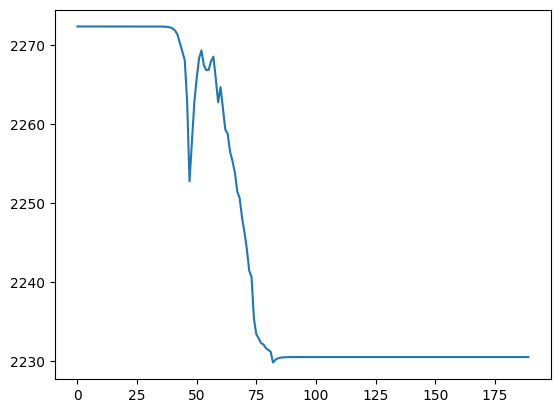

In [48]:
plt.plot(np.arange(len(np_coords_swp)),coordZ)

In [49]:
len(np_coords_swp)

190

In [50]:
type(np_coords_swp)

numpy.ndarray

In [51]:
from mpl_toolkits import mplot3d

In [52]:
import numpy as np
import matplotlib.pyplot as plt

In [53]:
%matplotlib notebook

In [57]:
np_coords_swp[0]

array([  19.32196393,  -99.18465214, 2272.33449403])

In [58]:
coordsX = []
for i,each in enumerate(np_coords_swp):
    coordsX.append(each[0])
    
coordsY = []
for i,each in enumerate(np_coords_swp):
    coordsY.append(each[1])
    
coordsZ = []
for each in np_coords_swp:
    coordsZ.append(each[2])

In [ ]:
coordsX, coordsY

In [ ]:
coordsZ - np.array(coordsZ).mean()

In [59]:
np.array(coordsZ).mean()

2244.772973985878

In [72]:
np.array(coordsX)+40

array([59.32196393, 59.32189886, 59.32211139, 59.32224684, 59.3224622 ,
       59.32267999, 59.32273742, 59.32286333, 59.32299653, 59.32321546,
       59.32339755, 59.32348327, 59.32352296, 59.32351482, 59.32346766,
       59.32308714, 59.32283852, 59.32259587, 59.32235445, 59.32212229,
       59.32204781, 59.32205727, 59.32216406, 59.32224448, 59.32222012,
       59.32204727, 59.32182014, 59.32184855, 59.32203956, 59.32263895,
       59.3231911 , 59.3238677 , 59.3240259 , 59.32428468, 59.32456783,
       59.32486324, 59.32528538, 59.32537604, 59.32548832, 59.32547437,
       59.32479705, 59.32473582, 59.32595991, 59.32723558, 59.32850206,
       59.32974338, 59.33303565, 59.33412178, 59.33606784, 59.33636986,
       59.33685394, 59.33788591, 59.33815765, 59.33843271, 59.33862862,
       59.33901815, 59.33932869, 59.3396822 , 59.34071564, 59.34160467,
       59.34569943, 59.34956174, 59.35044266, 59.35151439, 59.35303717,
       59.35403882, 59.35720613, 59.36134539, 59.36313416, 59.36